In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df=pd.read_csv("owid-co2-data.csv")

In [152]:
df.head(2)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

## Data Cleaning

In [154]:
missing_ratio=df.isna().mean()

In [155]:
missing_ratio.head()

country       0.000000
year          0.000000
iso_code      0.157977
population    0.182742
gdp           0.696141
dtype: float64

In [156]:
cols_to_drop=missing_ratio[missing_ratio>0.7].index.tolist()
df1=df.drop(columns=cols_to_drop)
print(f'colums dropped{len(cols_to_drop)}, Remaining:{df1.shape[1]}')

colums dropped20, Remaining:59


In [157]:
numeric_cols=df1.select_dtypes(include=np.number).columns.tolist()

In [158]:
numeric_cols

['year',
 'population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_including_luc',
 'co2_including_luc_growth_abs',
 'co2_including_luc_growth_prct',
 'co2_including_luc_per_capita',
 'co2_including_luc_per_gdp',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'coal_co2_per_capita',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_co2_including_luc',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_luc_co2',
 'cumulative_oil_co2',
 'flaring_co2',
 'gas_co2',
 'gas_co2_per_capita',
 'ghg_excluding_lucf_per_capita',
 'ghg_per_capita',
 'land_use_change_co2',
 'land_use_change_co2_per_capita',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrous_oxide_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'share_global_cement_co2',
 'share_global_co2',
 'share_global_co2_including_luc',
 'share_global_coal_co2',
 'share_global_cumulative_cement_co2',
 'share_global_cumulative_co2

#### Interpolation

In [159]:
df1[numeric_cols]=df1.groupby('country')[numeric_cols].transform(lambda group : group.interpolate(limit_direction='both'))

In [160]:
df1

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1750,AFG,2802560.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
1,Afghanistan,1751,AFG,2808929.5,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
2,Afghanistan,1752,AFG,2815299.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
3,Afghanistan,1753,AFG,2821668.5,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
4,Afghanistan,1754,AFG,2828038.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.025,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.025,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.025,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.025,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [161]:
df1['country']=df1['country'].str.strip()

In [162]:
regions = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'European Union', 'International Transport']

In [163]:
regions

['World',
 'Asia',
 'Europe',
 'Africa',
 'North America',
 'South America',
 'European Union',
 'International Transport']

In [164]:
df1=df1[~df1['country'].isin(regions)]

In [165]:
df1

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1750,AFG,2802560.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
1,Afghanistan,1751,AFG,2808929.5,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
2,Afghanistan,1752,AFG,2815299.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
3,Afghanistan,1753,AFG,2821668.5,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
4,Afghanistan,1754,AFG,2828038.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,...,0.000,0.113,0.000,0.156,0.000,0.000,0.000,0.0,7.436,0.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.025,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.025,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.025,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.025,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [166]:
import plotly.express as px

## EDA

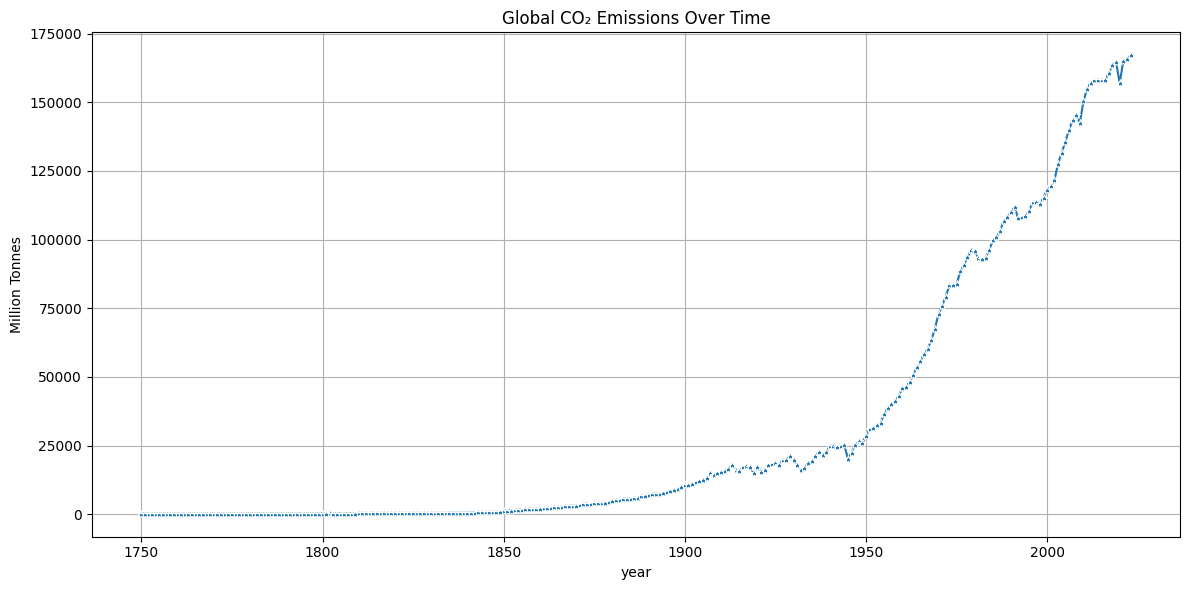

In [167]:
global_trend = df1.groupby('year')['co2'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=global_trend,x='year',y='co2',marker='*')
plt.title('Global CO₂ Emissions Over Time')
plt.ylabel('Million Tonnes')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top emitters in recent years

In [168]:
latest_year=df1['year'].max()

In [169]:
top_emitters=df1[df1['year']==latest_year].sort_values(by='co2', ascending=False).head(10)

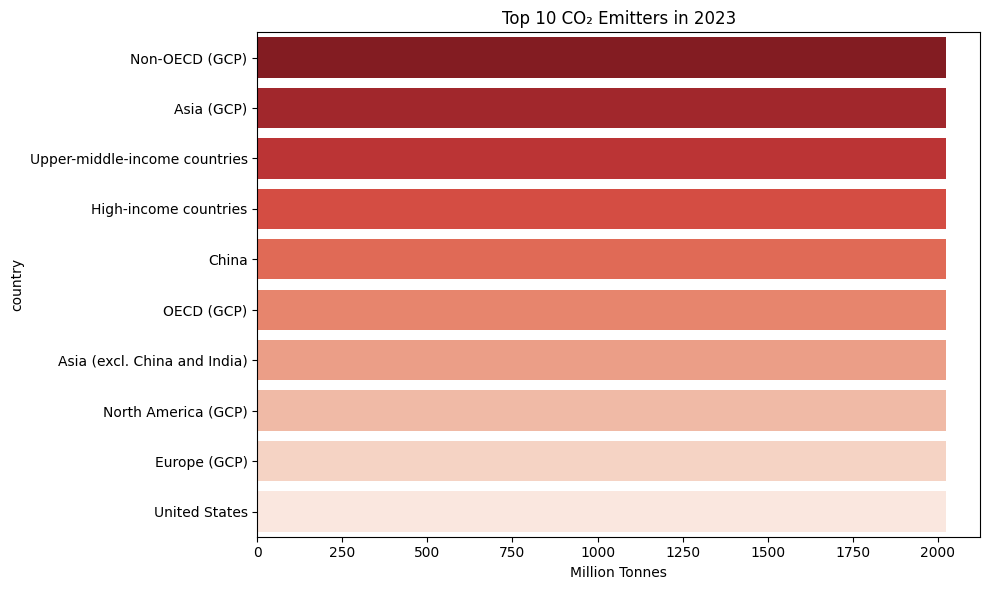

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_emitters,x='year',y='country',palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitters in {latest_year}')
plt.xlabel('Million Tonnes')
plt.tight_layout()
plt.show()

## Heatmap of Key Correlations

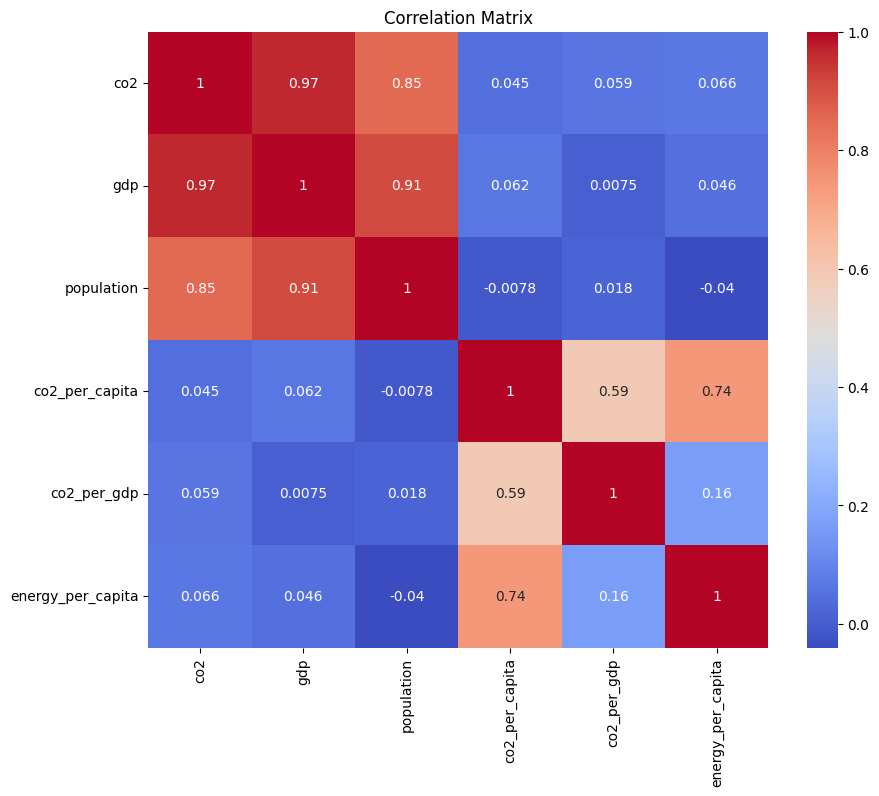

In [171]:
metrics = ['co2', 'gdp', 'population', 'co2_per_capita', 'co2_per_gdp', 'energy_per_capita']
corr = df[metrics].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


###  CO₂ Over Time

In [172]:
countries=['Kenya','USA','China']
df_countries=df1[df1['country'].isin(countries)]

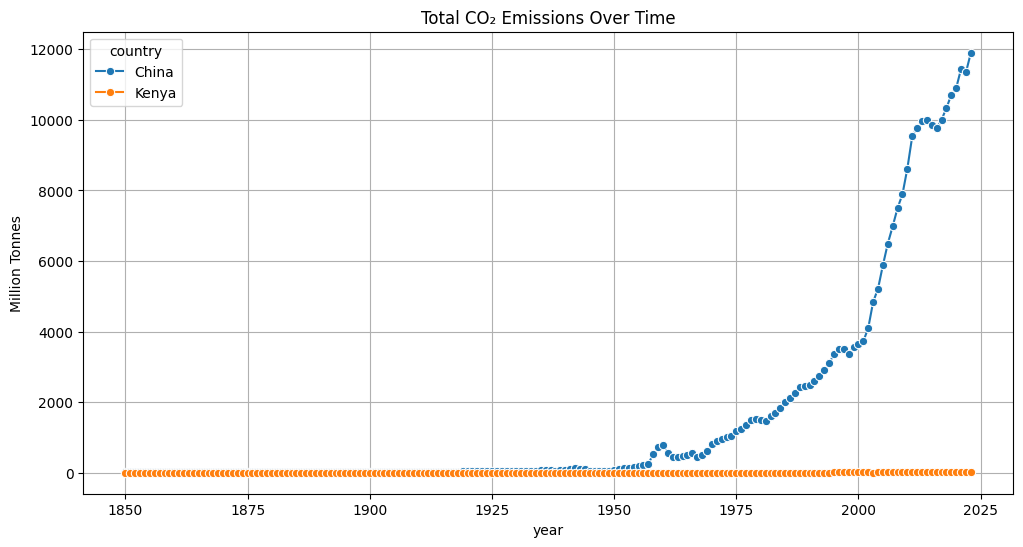

In [173]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries,x='year',y='co2',hue='country', marker='o')
plt.title('Total CO₂ Emissions Over Time')
plt.ylabel('Million Tonnes')
plt.grid(True)
plt.show()

### CO₂ Per Capita

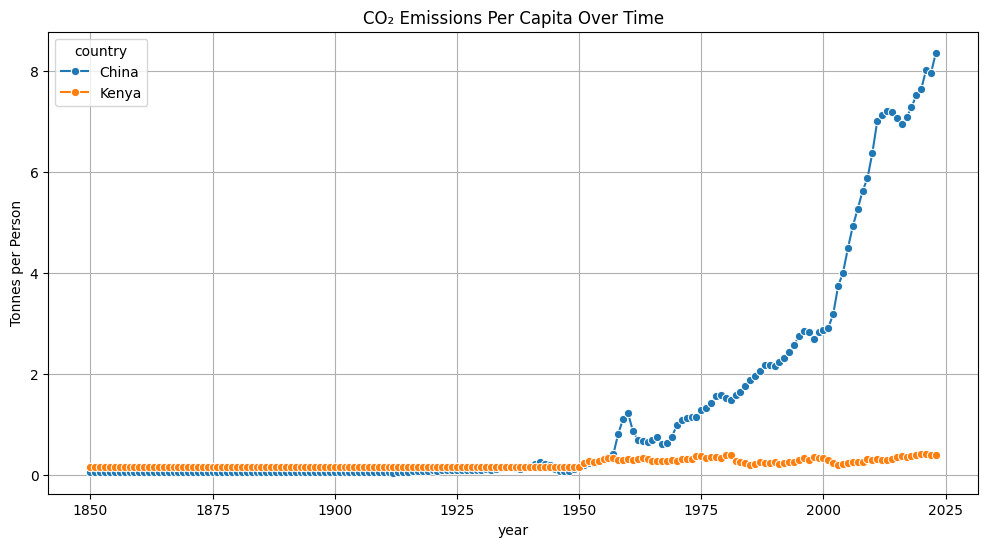

In [174]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='year', y='co2_per_capita', hue='country', marker='o')
plt.title('CO₂ Emissions Per Capita Over Time')
plt.ylabel('Tonnes per Person')
plt.grid(True)
plt.show()

### CO₂ per GDP (Emissions Efficiency)

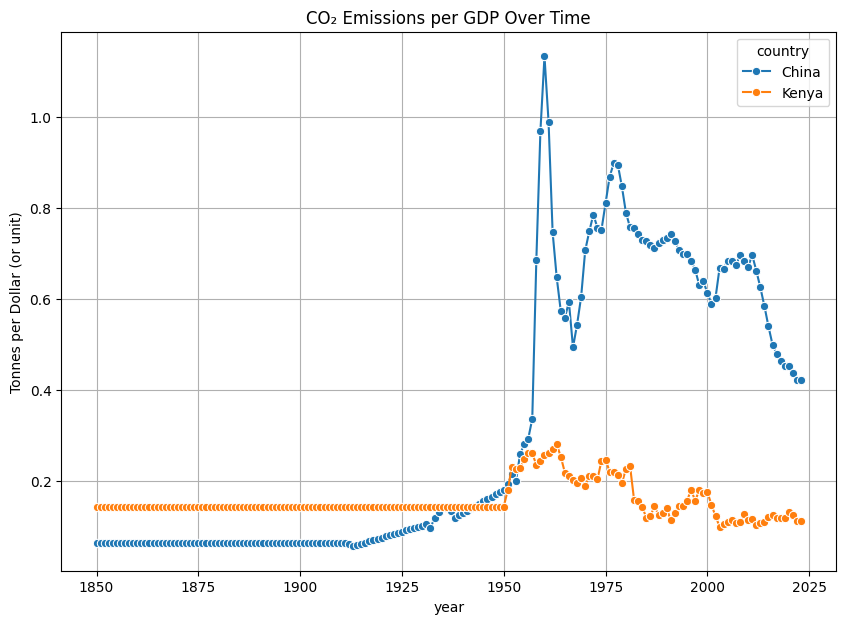

In [175]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_countries,x='year',y='co2_per_gdp',hue='country', marker='o')
plt.title('CO₂ Emissions per GDP Over Time')
plt.ylabel('Tonnes per Dollar (or unit)')
plt.grid(True)
plt.show()

### GDP vs CO₂ Per Capita

In [176]:
df_latest = df_countries[df_countries['year'] == df_countries['year'].max()]
plot_df = df_latest[['country', 'gdp', 'co2_per_capita', 'population']].dropna()

fig = px.scatter(
    plot_df,
    x='gdp',
    y='co2_per_capita',
    size='population',
    color='country',
    hover_name='country',
    title='GDP vs CO₂ Per Capita'
)
fig.show()
